In [1]:
import os
import pandas as pd

data_path = './dataset/'

train = pd.read_csv(data_path+'train.csv')
test = pd.read_csv(data_path+'test.csv')
submission = pd.read_csv(data_path+'sampleSubmission.csv')

In [2]:
test.shape

(6493, 9)

In [3]:
train.shape

(10886, 12)

In [4]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [5]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
print(train['datetime'][100])
print(train['datetime'][100].split())
# print(train['datetime'])

2011-01-05 09:00:00
['2011-01-05', '09:00:00']


In [7]:
train['date'] = train['datetime'].apply(lambda x: x.split()[0])
train['year'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[0])
train['month'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[1])
train['day'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[2])
train['hour'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[0])
train['minute'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[1])
train['second'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[2])

In [8]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00


In [9]:
from datetime import datetime
import calendar

train['weekday'] = train['date'].apply(
    lambda dateString:
    calendar.day_name[datetime.strptime(dateString, "%Y-%m-%d").weekday()]
)
train['season'] = train['season'].map({1: 'Spring',
                                       2: 'Summer',
                                       3: 'Fall',
                                       4: 'Winter'
                                       })
train['weather'] = train['weather'].map({
    1: 'Clear',
    2: 'Mist, Few clouds',
    3: 'Light Snow, Rain, Thunderstorm',
    4: 'Heavy Rain, Thunderstrom, Snow, Fog'
})


train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday


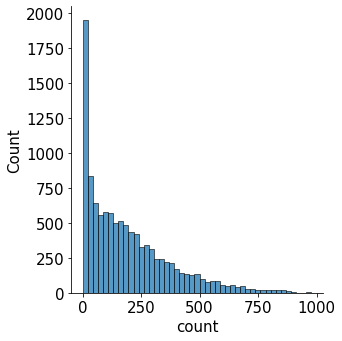

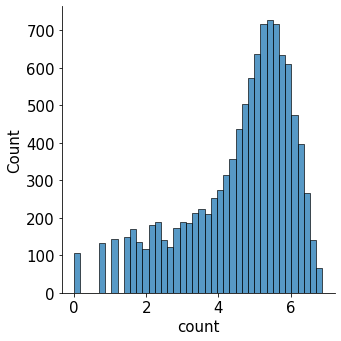

In [10]:
import seaborn as sns
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

mpl.rc('font', size=15)
sns.displot(train['count'])
sns.displot(np.log(train['count']))

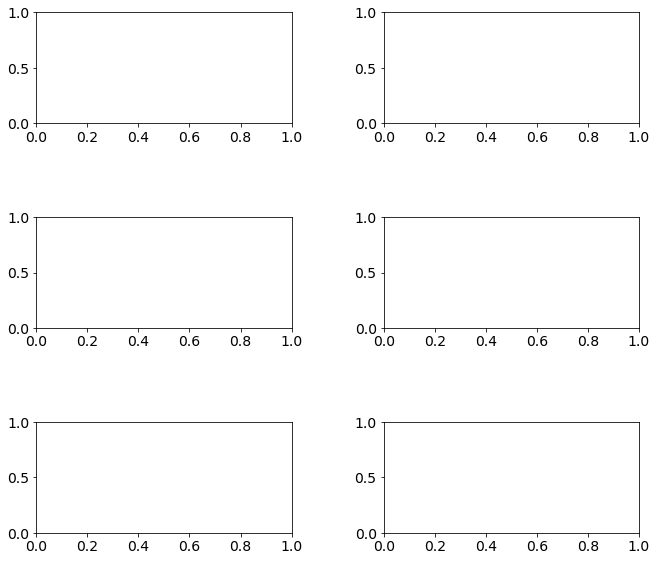

In [11]:
mpl.rc('font', size=14)
mpl.rc('axes', titlesize=15)
figure, axes = plt.subplots(nrows=3, ncols=2)
plt.tight_layout()
figure.set_size_inches(10, 9)

<AxesSubplot:xlabel='second', ylabel='count'>

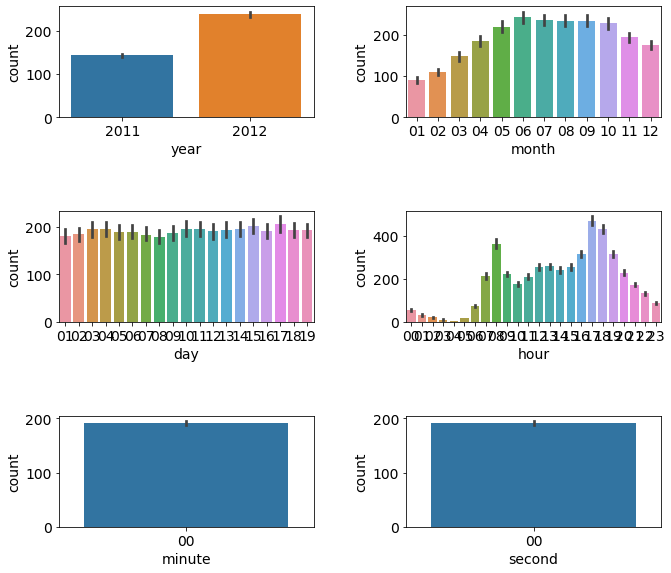

In [12]:
# 스텝 1 : m행 n열 Figure 준비
mpl.rc('font', size=14)       # 폰트 크기 설정
mpl.rc('axes', titlesize=15)  # 각 축의 제목 크기 설정
figure, axes = plt.subplots(nrows=3, ncols=2)  # 3행 2열 Figure 생성
plt.tight_layout()            # 그래프 사이에 여백 확보
figure.set_size_inches(10, 9)  # 전체 Figure 크기를 10x9인치로 설정

# 스텝 2 : 각 축에 서브플롯 할당
# 각 축에 연도, 월, 일, 시간, 분, 초별 평균 대여 수량 막대 그래프 할당
sns.barplot(x='year', y='count', data=train, ax=axes[0, 0])
sns.barplot(x='month', y='count', data=train, ax=axes[0, 1])
sns.barplot(x='day', y='count', data=train, ax=axes[1, 0])
sns.barplot(x='hour', y='count', data=train, ax=axes[1, 1])
sns.barplot(x='minute', y='count', data=train, ax=axes[2, 0])
sns.barplot(x='second', y='count', data=train, ax=axes[2, 1])

# 스텝 3 : 세부 설정
# 3-1 : 서브플롯에 제목 달기
# axes[0, 0].set(title='Rental amounts by year')
# axes[0, 1].set(title='Rental amounts by month')
# axes[1, 0].set(title='Rental amounts by day')
# axes[1, 1].set(title='Rental amounts by hour')
# axes[2, 0].set(title='Rental amounts by minute')
# axes[2, 1].set(title='Rental amounts by second')

# 3-2 : 1행에 위치한 서브플롯들의 x축 라벨 90도 회전
# axes[1, 0].tick_params(axis='x', labelrotation=90)
# axes[1, 1].tick_params(axis='x', labelrotation=90)

<AxesSubplot:xlabel='workingday', ylabel='count'>

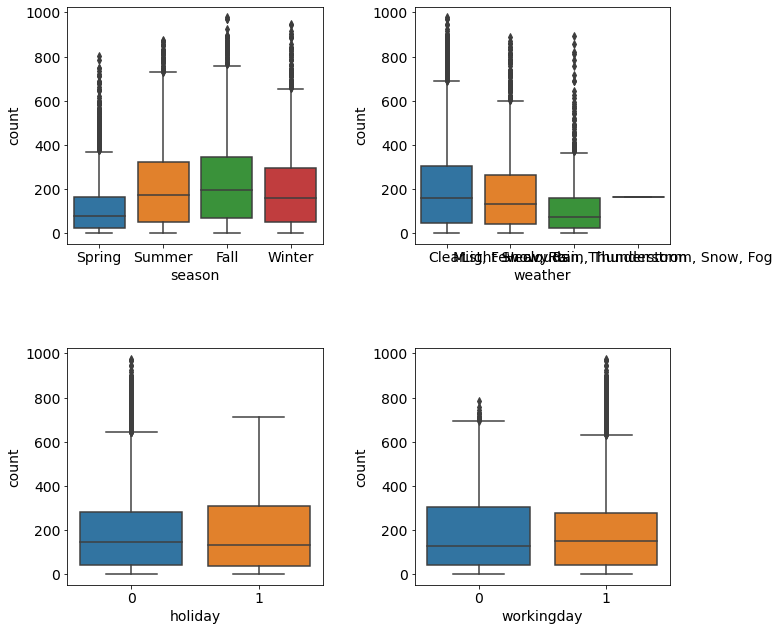

In [13]:
figure, axes = plt.subplots(nrows=2, ncols=2)
plt.tight_layout()
figure.set_size_inches(10, 10)

sns.boxplot(x='season', y='count', data=train, ax=axes[0, 0])
sns.boxplot(x='weather', y='count', data=train, ax=axes[0, 1])
sns.boxplot(x='holiday', y='count', data=train, ax=axes[1, 0])
sns.boxplot(x='workingday', y='count', data=train, ax=axes[1, 1])

In [14]:
import pandas as pd

data_path = './dataset/'
train = pd.read_csv(data_path+'train.csv')
test = pd.read_csv(data_path+'test.csv')
submission = pd.read_csv(data_path+'sampleSubmission.csv')

In [15]:
train = train[train['weather'] != 4]

In [16]:
all_data = pd.concat([train, test], ignore_index=True)
all_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17373,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17374,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17375,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
17376,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


In [17]:
from datetime import datetime

all_data['date'] = all_data['datetime'].apply(lambda x: x.split()[0])
all_data['year'] = all_data['datetime'].apply(
    lambda x: x.split()[0].split('-')[0])
all_data['month'] = all_data['datetime'].apply(
    lambda x: x.split()[0].split('-')[1])
all_data['hour'] = all_data['datetime'].apply(
    lambda x: x.split()[1].split(':')[0])
all_data['weekday'] = all_data['date'].apply(
    lambda dateString: datetime.strptime(dateString, "%Y-%m-%d").weekday())

In [27]:
drop_features = ['casual', 'registered',
                 'datetime', 'date', 'windspeed', 'month']

all_data = all_data.drop(drop_features, axis=1)

In [28]:
all_data

,season,holiday,workingday,weather,temp,atemp,humidity,count,year,hour,weekday
0,1,0,0,1,9.84,14.395,81,16.0,2011,00,5
1,1,0,0,1,9.02,13.635,80,40.0,2011,01,5
2,1,0,0,1,9.02,13.635,80,32.0,2011,02,5
3,1,0,0,1,9.84,14.395,75,13.0,2011,03,5
4,1,0,0,1,9.84,14.395,75,1.0,2011,04,5
...,...,...,...,...,...,...,...,...,...,...,...
17373,1,0,1,2,10.66,12.880,60,NaN,2012,19,0
17374,1,0,1,2,10.66,12.880,60,NaN,2012,20,0
17375,1,0,1,1,10.66,12.880,60,NaN,2012,21,0
17376,1,0,1,1,10.66,13.635,56,NaN,2012,22,0


In [29]:
X_train = all_data[~pd.isnull(all_data['count'])]
X_test = all_data[pd.isnull(all_data['count'])]

In [30]:
X_train = X_train.drop(['count'], axis=1)
X_test = X_test.drop(['count'], axis=1)

y = train['count']

In [31]:
import numpy as np


def rmsle(y_true, y_pred, convertExp=True):
    if convertExp:
        y_true = np.exp(y_true)
        y_pred = np.exp(y_pred)
    log_true = np.nan_to_num(np.log(y_true+1))
    log_pred = np.nan_to_num(np.log(y_pred+1))

    output = np.sqrt(np.mean((log_true-log_pred)**2))
    return output

In [32]:
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()

In [33]:
log_y = np.log(y)
linear_reg_model.fit(X_train, log_y)

LinearRegression()

In [34]:
linear_reg_preds = linear_reg_model.predict(X_test)

submission['count']=np.exp(linear_reg_preds)
submission.to_csv('submission.csv',index=False)

In [35]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

ridge_model = Ridge()
ridge_params = {'max_iter':[3000],'alpha':[0.1,1,2,3,4,10,100,200,1000]}
rmsle_scorer = metrics.make_scorer(rmsle,greater_is_better=False)
gridsearch_ridge_model = GridSearchCV(estimator=ridge_model,param_grid=ridge_params,scoring=rmsle_scorer,cv=5)

In [36]:
gridsearch_ridge_model.fit(X_train,log_y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 2, 3, 4, 10, 100, 200, 1000],
                         'max_iter': [3000]},
             scoring=make_scorer(rmsle, greater_is_better=False))

In [37]:
print("opt param : ",gridsearch_ridge_model.best_params_)

opt param :  {'alpha': 0.1, 'max_iter': 3000}


In [38]:
preds = gridsearch_ridge_model.best_estimator_.predict(X_train)


In [39]:
from sklearn.linear_model import Lasso

lasso_model = Lasso()
lasso_alpha = 1/np.array([0.1,1,2,3,4,10,30,100,900,1000])
lasso_params = {'max_iter':[3000],'alpha':lasso_alpha}
gridsearch_lasso_model = GridSearchCV(estimator=lasso_model,param_grid=lasso_params,scoring=rmsle_scorer,cv=5)
gridsearch_lasso_model.fit(X_train,log_y)
print("opt param : ",gridsearch_lasso_model.best_params_)


opt param :  {'alpha': 0.0011111111111111111, 'max_iter': 3000}


In [40]:
from sklearn.ensemble import RandomForestRegressor

randomforest_model = RandomForestRegressor()
rf_params= {'random_state':[42],'n_estimators':[100,120,140]}
gridsearch_random_forest_model = GridSearchCV(estimator=randomforest_model,param_grid=rf_params,scoring=rmsle_scorer,cv=5)


In [41]:
gridsearch_random_forest_model.fit(X_train,log_y)
print("opt param : ",gridsearch_random_forest_model.best_params_)

opt param :  {'n_estimators': 140, 'random_state': 42}


Text(0.5, 1.0, 'predict')

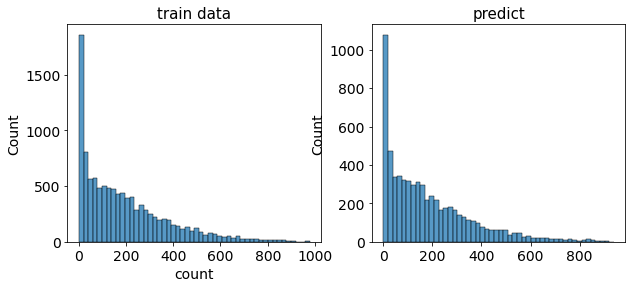

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

randomforest_preds = gridsearch_random_forest_model.best_estimator_.predict(X_test)

figure, axes = plt.subplots(ncols=2)
figure.set_size_inches(10,4)

sns.histplot(y,bins=50,ax=axes[0])
axes[0].set_title("train data")
sns.histplot(np.exp(randomforest_preds),bins=50,ax=axes[1])
axes[1].set_title('predict')

In [44]:
submission['count']=np.exp(randomforest_preds)
submission.to_csv('submission.csv',index=False)